In [1]:
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated

In [2]:
equifax_baseline_data = ingest_experiment_results(path.join('data', 'EquifaxBaseline_v2'))

simple_deception = ingest_experiment_results(path.join('data', 'Equifax_StaticRandomDefender'))

honeycred_deception_1 = ingest_experiment_results(path.join('data', 'Equifax_honeycred_1'))

honeycred_deception_5 = ingest_experiment_results(path.join('data', 'Equifax_honeycred_5'))

honeycred_deception_10 = ingest_experiment_results(path.join('data', 'Equifax_honeycred_10'))

In [3]:
baseline_exfiltration_times = get_data_exfiltration_times(equifax_baseline_data)
simple_deception_exfiltration_times = get_data_exfiltration_times(simple_deception)


honeycred_1_exfiltration_times = get_data_exfiltration_times(honeycred_deception_1)

honeycred_5_exfiltration_times = get_data_exfiltration_times(honeycred_deception_5)

honeycred_10_exfiltration_times = get_data_exfiltration_times(honeycred_deception_10)

In [4]:
# Percent of experiments all data exfiltrated
baseline_exfiltration_percent = percent_of_data_exfiltrated(equifax_baseline_data)
simple_deception_exfiltration_percent = percent_of_data_exfiltrated(simple_deception)

honeycred_1_exfiltration_percent = percent_of_data_exfiltrated(honeycred_deception_1)

honeycred_5_exfiltration_percent = percent_of_data_exfiltrated(honeycred_deception_5)

honeycred_10_exfiltration_percent = percent_of_data_exfiltrated(honeycred_deception_10)

print(f'Baseline: {baseline_exfiltration_percent}')
print(f'Simple Deception: {simple_deception_exfiltration_percent}')
print(f'HoneyCred 1 Deception: {honeycred_1_exfiltration_percent}')
print(f'HoneyCred 5 Deception: {honeycred_5_exfiltration_percent}')
print(f'HoneyCred 10 Deception: {honeycred_10_exfiltration_percent}')

Baseline: 100.0
Simple Deception: 100.0
HoneyCred 1 Deception: 100.0
HoneyCred 5 Deception: 100.0
HoneyCred 10 Deception: 100.0


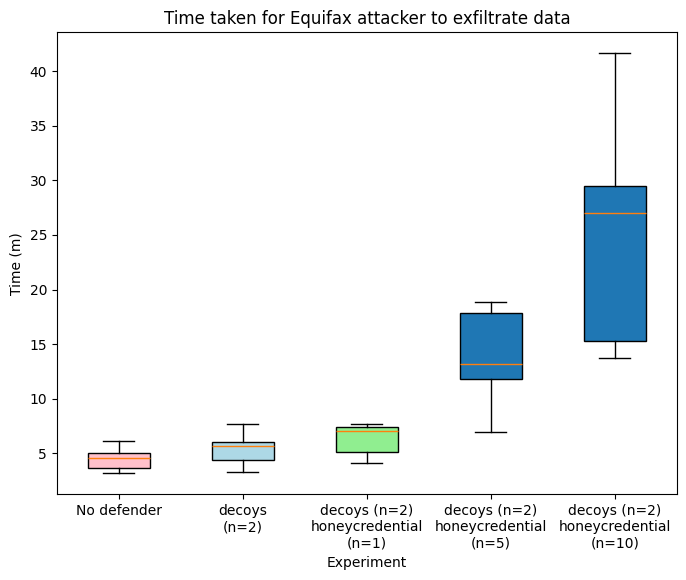

In [14]:
# Box plot comparing data exfiltration times
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([baseline_exfiltration_times, simple_deception_exfiltration_times, honeycred_1_exfiltration_times, honeycred_5_exfiltration_times, honeycred_10_exfiltration_times], patch_artist=True)

plt.xticks([1, 2, 3, 4,5 ], ['No defender', 'decoys\n(n=2)', 'decoys (n=2)\nhoneycredential\n(n=1)', 'decoys (n=2)\nhoneycredential\n(n=5)', 'decoys (n=2)\nhoneycredential\n(n=10)'])

plt.ylabel('Time (m)')
plt.xlabel('Experiment')
plt.title('Time taken for Equifax attacker to exfiltrate data')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()



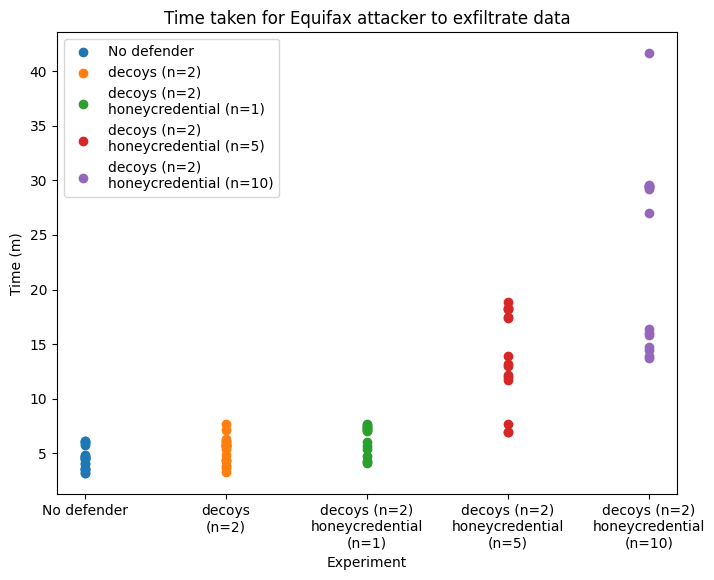

In [9]:
# whisker scatter plot comparing data exfiltration times
plt.figure(figsize=(8, 6))
plt.scatter([1]*len(baseline_exfiltration_times), baseline_exfiltration_times, label='No defender')
plt.scatter([2]*len(simple_deception_exfiltration_times), simple_deception_exfiltration_times, label='decoys (n=2)')
plt.scatter([3]*len(honeycred_1_exfiltration_times), honeycred_1_exfiltration_times, label='decoys (n=2)\nhoneycredential (n=1)')
plt.scatter([4]*len(honeycred_5_exfiltration_times), honeycred_5_exfiltration_times, label='decoys (n=2)\nhoneycredential (n=5)')
plt.scatter([5]*len(honeycred_10_exfiltration_times), honeycred_10_exfiltration_times, label='decoys (n=2)\nhoneycredential (n=10)')
plt.legend()
plt.xticks([1, 2, 3, 4,5 ], ['No defender', 'decoys\n(n=2)', 'decoys (n=2)\nhoneycredential\n(n=1)', 'decoys (n=2)\nhoneycredential\n(n=5)', 'decoys (n=2)\nhoneycredential\n(n=10)'])
plt.ylabel('Time (m)')
plt.xlabel('Experiment')
plt.title('Time taken for Equifax attacker to exfiltrate data')
plt.show()


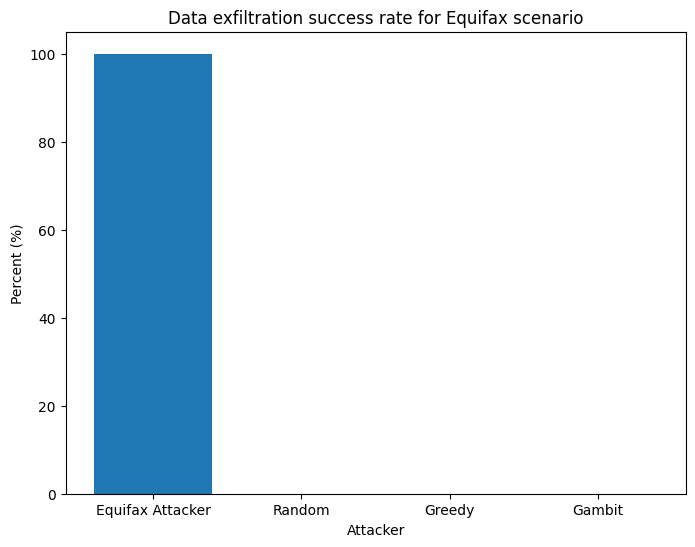

In [6]:
# Data exfiltration success rate
plt.figure(figsize=(8, 6))
plt.bar(['Equifax Attacker', 'Random', 'Greedy', 'Gambit'], [baseline_exfiltration_percent, 0, 0, 0])
plt.ylabel('Percent (%)')
plt.xlabel('Attacker')
plt.title('Data exfiltration success rate for Equifax scenario')
plt.show()

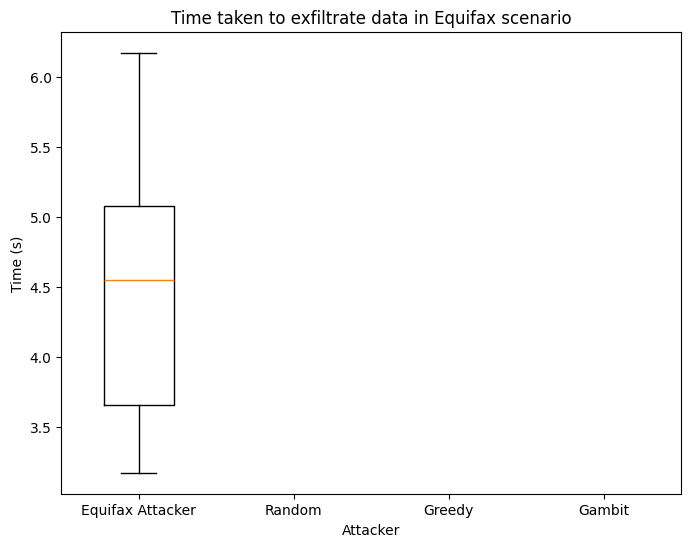

In [7]:
# Time taken to exfiltrate data
plt.figure(figsize=(8, 6))
plt.boxplot([baseline_exfiltration_times, [], [], []])
# add x-tick labels
plt.xticks([1, 2, 3, 4], ['Equifax Attacker', 'Random', 'Greedy', 'Gambit'])

plt.ylabel('Time (s)')
plt.xlabel('Attacker')
plt.title('Time taken to exfiltrate data in Equifax scenario')
plt.show()

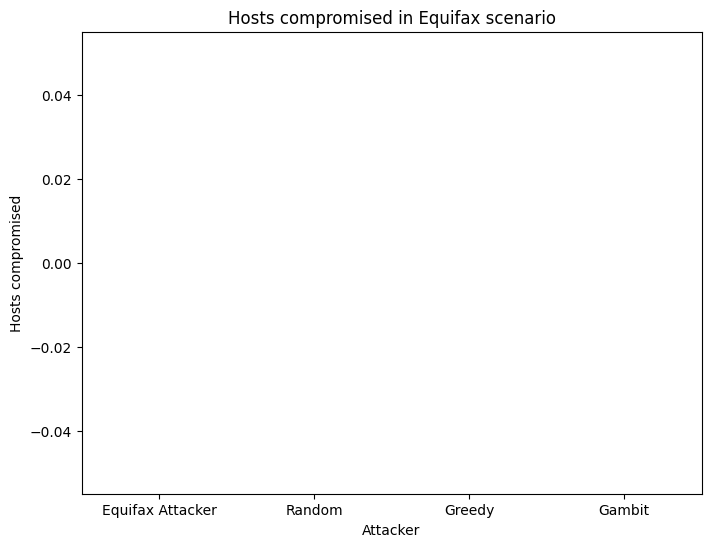

In [8]:
# Time taken to exfiltrate data
plt.figure(figsize=(8, 6))
plt.boxplot([[], [], [], []])
# add x-tick labels
plt.xticks([1, 2, 3, 4], ['Equifax Attacker', 'Random', 'Greedy', 'Gambit'])

plt.ylabel('Hosts compromised')
plt.xlabel('Attacker')
plt.title('Hosts compromised in Equifax scenario')
plt.show()
